# Tutorial 2: 3D  Pose

In [13]:
import numpy as np

def rotation_matrix(axis: str, angle: float) -> np.ndarray:
    """
    Computes a 3D rotation matrix for a given axis and angle (in radians).

    Parameters
    ----------
    axis : str
        The axis of rotation: 'x', 'y', or 'z'.
    angle : float
        The rotation angle in radians.

    Returns
    -------
    R : np.ndarray
        A 3x3 SO(3) rotation matrix (float64).
    """
    if axis == 'x':
        return np.array([
            [1, 0, 0],
            [0, np.cos(angle), -np.sin(angle)],
            [0, np.sin(angle),  np.cos(angle)]
        ], dtype=np.float64)

    elif axis == 'y':
        return np.array([
            [np.cos(angle), 0, np.sin(angle)],
            [0, 1, 0],
            [-np.sin(angle), 0, np.cos(angle)]
        ], dtype=np.float64)

    elif axis == 'z':
        return np.array([
            [np.cos(angle), -np.sin(angle), 0],
            [np.sin(angle),  np.cos(angle), 0],
            [0, 0, 1]
        ], dtype=np.float64)

    else:
        raise ValueError("axis must be one of: 'x', 'y', or 'z'")

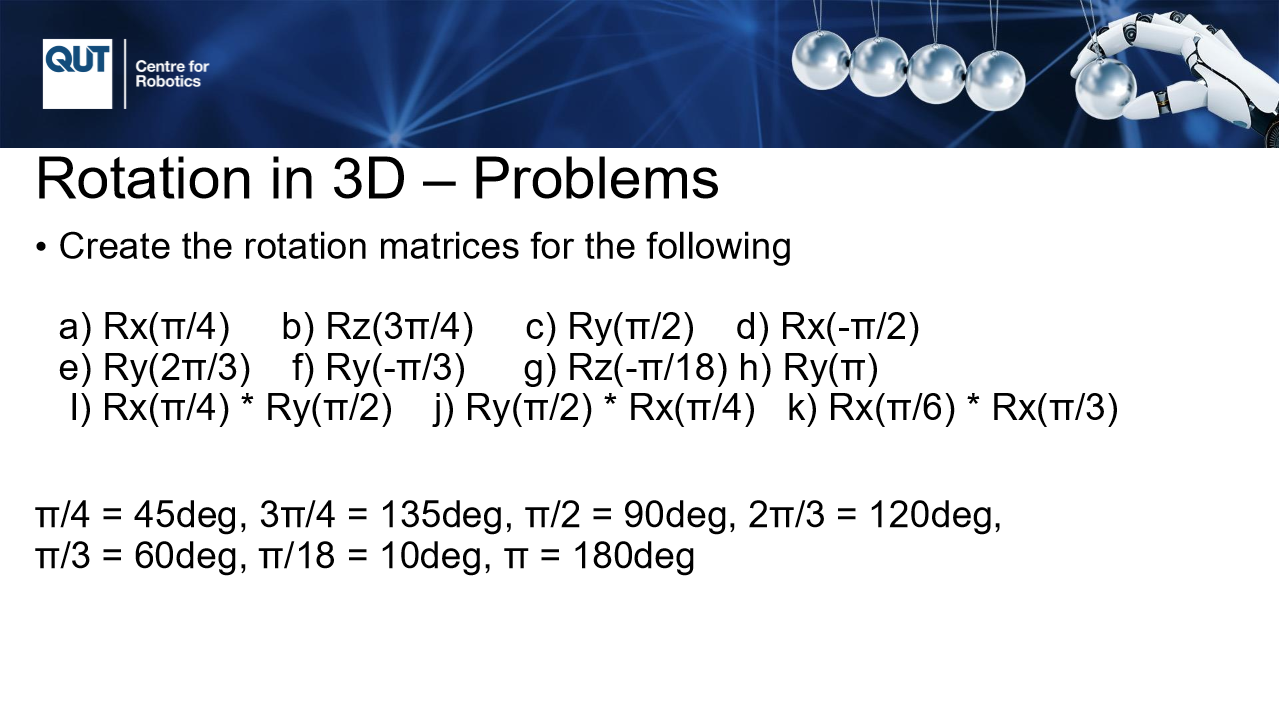

In [14]:
np.set_printoptions(precision=3, suppress=True)

# a) Rx(π/4)
Ra = rotation_matrix('x', np.pi/4)

# b) Rz(3π/4)
Rb = rotation_matrix('z', 3*np.pi/4)

# c) Ry(π/2)
Rc = rotation_matrix('y', np.pi/2)

# d) Rx(-π/2)
Rd = rotation_matrix('x', -np.pi/2)

# e) Ry(2π/3)
Re = rotation_matrix('y', 2*np.pi/3)

# f) Ry(-π/3)
Rf = rotation_matrix('y', -np.pi/3)

# g) Rz(-π/18)
Rg = rotation_matrix('z', -np.pi/18)

# h) Ry(π)
Rh = rotation_matrix('y', np.pi)

# i) Rx(π/4) * Ry(π/2)
Ri = rotation_matrix('x', np.pi/4) @ rotation_matrix('y', np.pi/2)

# j) Ry(π/2) * Rx(π/4)
Rj = rotation_matrix('y', np.pi/2) @ rotation_matrix('x', np.pi/4)

# k) Rx(π/6) * Rx(π/3)
Rk = rotation_matrix('x', np.pi/6) @ rotation_matrix('x', np.pi/3)

print("a) Rx(π/4):\n", Ra, "\n")
print("b) Rz(3π/4):\n", Rb, "\n")
print("c) Ry(π/2):\n", Rc, "\n")
print("d) Rx(-π/2):\n", Rd, "\n")
print("e) Ry(2π/3):\n", Re, "\n")
print("f) Ry(-π/3):\n", Rf, "\n")
print("g) Rz(-π/18):\n", Rg, "\n")
print("h) Ry(π):\n", Rh, "\n")
print("i) Rx(π/4) * Ry(π/2):\n", Ri, "\n")
print("j) Ry(π/2) * Rx(π/4):\n", Rj, "\n")
print("k) Rx(π/6) * Rx(π/3):\n", Rk, "\n")

a) Rx(π/4):
 [[ 1.     0.     0.   ]
 [ 0.     0.707 -0.707]
 [ 0.     0.707  0.707]] 

b) Rz(3π/4):
 [[-0.707 -0.707  0.   ]
 [ 0.707 -0.707  0.   ]
 [ 0.     0.     1.   ]] 

c) Ry(π/2):
 [[ 0.  0.  1.]
 [ 0.  1.  0.]
 [-1.  0.  0.]] 

d) Rx(-π/2):
 [[ 1.  0.  0.]
 [ 0.  0.  1.]
 [ 0. -1.  0.]] 

e) Ry(2π/3):
 [[-0.5    0.     0.866]
 [ 0.     1.     0.   ]
 [-0.866  0.    -0.5  ]] 

f) Ry(-π/3):
 [[ 0.5    0.    -0.866]
 [ 0.     1.     0.   ]
 [ 0.866  0.     0.5  ]] 

g) Rz(-π/18):
 [[ 0.985  0.174  0.   ]
 [-0.174  0.985  0.   ]
 [ 0.     0.     1.   ]] 

h) Ry(π):
 [[-1.  0.  0.]
 [ 0.  1.  0.]
 [-0.  0. -1.]] 

i) Rx(π/4) * Ry(π/2):
 [[ 0.     0.     1.   ]
 [ 0.707  0.707 -0.   ]
 [-0.707  0.707  0.   ]] 

j) Ry(π/2) * Rx(π/4):
 [[ 0.     0.707  0.707]
 [ 0.     0.707 -0.707]
 [-1.     0.     0.   ]] 

k) Rx(π/6) * Rx(π/3):
 [[ 1.  0.  0.]
 [ 0.  0. -1.]
 [ 0.  1.  0.]] 



In [15]:
def transformation_matrix(axis: str, angle: float, t: np.ndarray) -> np.ndarray:
    """
    Create a 3D homogeneous transformation matrix (SE(3)).

    Parameters
    ----------
    axis : str
        Axis of rotation: 'x', 'y', or 'z'.
    angle : float
        Rotation angle in radians.
    t : np.ndarray
        Translation vector (3-element 1D array).

    Returns
    -------
    T : np.ndarray
        4x4 SE(3) homogeneous transformation matrix (float64).
    """
    R = rotation_matrix(axis, angle)
    t = np.array(t, dtype=np.float64).reshape(3)

    T = np.eye(4, dtype=np.float64)
    T[:3, :3] = R
    T[:3, 3] = t

    return T

p_S = np.array([2, 0, 0], dtype=np.float64)

# Pose in 3D - Problems
## For all these problems, point P will be defined in frame B and should be transformed into frame A

### Q1 
#### Frame B is located at [2,0,0] relative to frame A, and has been rotated by π/4 (45 deg) around the x-axis, followed by a π/4 (45deg) rotation about the new y-axis. Point P is at [0,3,0].


In [16]:
# Step 1: Rotation from frame B to A
Rx = rotation_matrix('x', np.pi/4)
Ry = rotation_matrix('y', np.pi/4)
R_BA = Rx @ Ry  # First x, then new y

# Step 2: Translation
t_BA = np.array([2, 0, 0])

# Step 3: Homogeneous transform matrix
T_BA = np.eye(4)
T_BA[:3, :3] = R_BA
T_BA[:3, 3] = t_BA

# Step 4: Point in frame B (homogeneous coordinates)
P_B = np.array([0, 3, 0, 1])  # x=0, y=3, z=0

# Step 5: Transform point into frame A
P_A = T_BA @ P_B

# Final result
print("Point P in frame A:", P_A[:3])


Point P in frame A: [2.    2.121 2.121]


### Q2
#### Frame A is located at [1,2,3] relative to frame B, and has been rotated by π/6 (30 deg) around the y-axis, followed by a π/4 (45\deg) rotation about the old z-axis. Point P is at [2,0,2].


In [17]:
# Point in frame B
P_B = np.array([2, 0, 2, 1])

# Translation of A in B
t_BA = np.array([1, 2, 3])

# Rotation from A to B (fixed/world axes = post-multiply = Rz @ Ry)
R_y = rotation_matrix('y', np.pi/6)
R_z = rotation_matrix('z', np.pi/4)
R_BA = R_z @ R_y  # Order: first Ry, then Rz (fixed/world axes)

# Homogeneous transform from A to B
T_BA = np.eye(4)
T_BA[:3, :3] = R_BA
T_BA[:3, 3] = t_BA

# To find point in frame A, we must invert T_BA
T_AB = np.linalg.inv(T_BA)

# Transform point from B to A
P_A = T_AB @ P_B

print("Point P in frame A:", P_A[:3])

Point P in frame A: [-0.112 -2.121 -1.22 ]


### Q3
#### Frame B is located at [1,1,1] relative to frame A, and has been rotated by π/2 (90 deg) around the x-axis, followed by a π/2 (90deg) rotation about the new z-axis, followed by a π/2 (90 deg) rotations about the new x-axis. Point P is at [0,5,3].


In [18]:
# Rotation matrices
Rx1 = rotation_matrix('x', np.pi/2)
Rz  = rotation_matrix('z', np.pi/2)
Rx2 = rotation_matrix('x', np.pi/2)

# Final rotation from B to A (body axes: apply right to left)
R_BA = Rx2 @ Rz @ Rx1

# Translation of B in A
t_BA = np.array([1, 1, 1])

# Construct homogeneous transform
T_BA = np.eye(4)
T_BA[:3, :3] = R_BA
T_BA[:3, 3] = t_BA

# Point in frame B
P_B = np.array([0, 5, 3, 1])

# Transform From B to A
P_A = T_BA @ P_B

# Output
print("Point P in frame A:", P_A[:3])

Point P in frame A: [ 4. -4.  1.]


### Q4
#### Frame A is located at [0,0,0] relative to frame B, and has been rotated by π/6 (30 deg) around the x-axis, followed by a π/4 (45deg) rotation about the old z-axis, followed by a π/3 (60 deg) rotation about the old y-axis. Point P is at [-1,-1,-1].


In [19]:
# Rotation matrices
R1 = rotation_matrix('x', np.pi/6)
R2  = rotation_matrix('z', np.pi/4)
R3 = rotation_matrix('y', np.pi/3)

# Total rotation from B to A
R_BA = R3 @ R2 @ R1

# Translation: A is at origin of B
t_BA = np.array([0, 0, 0])


# Homogeneous transformation matrix
T_BA = np.eye(4)
T_BA[:3, :3] = R_BA
T_BA[:3, 3] = t_BA

# Point in frame B (homogeneous)
P_B = np.array([-1, -1, -1, 1])

# Transform point to frame A
P_A = T_BA @ P_B

# Result
print("Point P in frame A:", P_A[:3])

Point P in frame A: [-1.407 -0.966 -0.295]
